In [1]:
%load_ext sql

Deploy Streamlit apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


Tip: You may define configurations in /Users/cjm/repos/go-db/pyproject.toml or /Users/cjm/.jupysql/config.

Did not find user configurations in /Users/cjm/repos/go-db/pyproject.toml.

In [2]:
%sql duckdb:///../../tmp/gcrp.db

Connecting to 'duckdb:///../../tmp/gcrp.db'

In [3]:
df = %sql SELECT * FROM gaf_association LIMIT 3
df.DataFrame()

Running query in 'duckdb:///../../tmp/gcrp.db'

,internal_id,db,db_object_id,db_object_symbol,qualifiers,ontology_class_ref,supporting_references,evidence_type,with_or_from,aspect,...,annotation_date_string,assigned_by,annotation_extensions,gene_product_form,annotation_date,subject,with_or_from_list,supporting_references_list,db_object_synonyms_list,annotation_extensions_list
0,1580,UniProtKB,A0A7K5ZL31,Slc6a9,enables,GO:0015375,GO_REF:0000118,IEA,PANTHER:PTHR11616:SF263,F,...,20240201,TreeGrafter,None,None,2024-02-01,UniProtKB:A0A7K5ZL31,[PANTHER:PTHR11616:SF263],[GO_REF:0000118],"[Slc6a9, ONYCOR_R00379]",NaN
1,1878,UniProtKB,A0A7K5ZL31,Slc6a9,involved_in,GO:0060012,GO_REF:0000118,IEA,PANTHER:PTHR11616:SF263,P,...,20240201,TreeGrafter,None,None,2024-02-01,UniProtKB:A0A7K5ZL31,[PANTHER:PTHR11616:SF263],[GO_REF:0000118],"[Slc6a9, ONYCOR_R00379]",NaN
2,3019,UniProtKB,A0A7K5ZL31,Slc6a9,involved_in,GO:1903804,GO_REF:0000118,IEA,PANTHER:PTHR11616:SF263,P,...,20240201,TreeGrafter,None,None,2024-02-01,UniProtKB:A0A7K5ZL31,[PANTHER:PTHR11616:SF263],[GO_REF:0000118],"[Slc6a9, ONYCOR_R00379]",NaN


Removing NULLs, if there exists any from aspect

<Axes: title={'center': 'gaf_association'}, xlabel='aspect', ylabel='Count'>

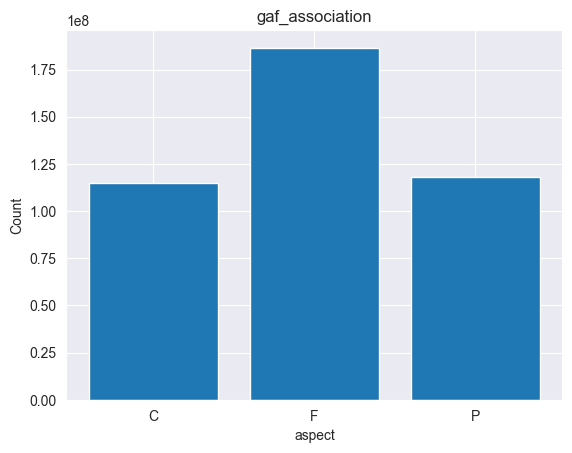

In [4]:
%sqlplot bar --table gaf_association --column aspect

In [5]:
%sqlcmd tables

Name
edge
entailed_edge
gaf_association
gaf_association_flat
gaf_association_plus_violations_m
gorule_violations_m
gpi
gpi_version_1_2_flat
rdfs_subclass_of_statement
retracted_publication


We will now create a stacked bar chart of the evidence types by aspect using maplotlib/seaborn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
def get_pairwise_counts(df, col1="evidence_type", col2="aspect", threshold=100):
    sql = f"SELECT {col1}, {col2},COUNT(*) AS count FROM gaf_association GROUP BY {col1}, {col2}"
    count_data = %sql {{sql}}
    count_df = count_data.DataFrame()
    filtered_df = count_df[count_df['count'] >= threshold]
    return filtered_df

In [8]:
def get_stacked_counts(df, col1="evidence_type", col2="aspect", threshold=100):
    sql = f"SELECT {col1}, {col2},COUNT(*) AS count FROM gaf_association GROUP BY {col1}, {col2}"
    count_data = %sql {{sql}}
    count_df = count_data.DataFrame()
    filtered_df = count_df[count_df['count'] >= threshold]
    pivot_df = filtered_df.pivot(index=col1, columns=col2, values='count').fillna(0)
    return pivot_df

get_stacked_counts(df, col1="evidence_type", col2="assigned_by")


Running query in 'duckdb:///../../tmp/gcrp.db'

assigned_by,ARUK-UCL,AgBase,Alzheimers_University_of_Toronto,AspGD,BHF-UCL,CACAO,CAFA,CGD,CollecTF,ComplexPortal,...,SGD,SynGO,TAIR,TIGR,TreeGrafter,UniProt,WB,YuBioLab,ZFIN,dictyBase
evidence_type,,,,,,,,,,,,,,,,,,,,,
EXP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371.0,215.0,...,0.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HDA,0.0,0.0,0.0,0.0,1834.0,0.0,0.0,0.0,0.0,0.0,...,7067.0,0.0,16159.0,0.0,0.0,8663.0,378.0,0.0,0.0,629.0
HEP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,251.0,0.0,0.0,0.0,181.0,0.0,0.0,124.0
HMP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC,0.0,0.0,0.0,0.0,750.0,0.0,0.0,0.0,0.0,0.0,...,322.0,0.0,0.0,0.0,0.0,1170.0,0.0,0.0,0.0,140.0
IDA,3935.0,3220.0,0.0,1470.0,14184.0,1722.0,2656.0,3280.0,0.0,5103.0,...,16097.0,13298.0,14164.0,0.0,0.0,107228.0,6002.0,0.0,3741.0,3671.0
IEA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,107812398.0,183440803.0,0.0,0.0,0.0,0.0
IEP,0.0,373.0,0.0,173.0,255.0,0.0,0.0,0.0,169.0,0.0,...,0.0,1021.0,2526.0,0.0,0.0,3851.0,107.0,0.0,142.0,186.0


Running query in 'duckdb:///../../tmp/gcrp.db'

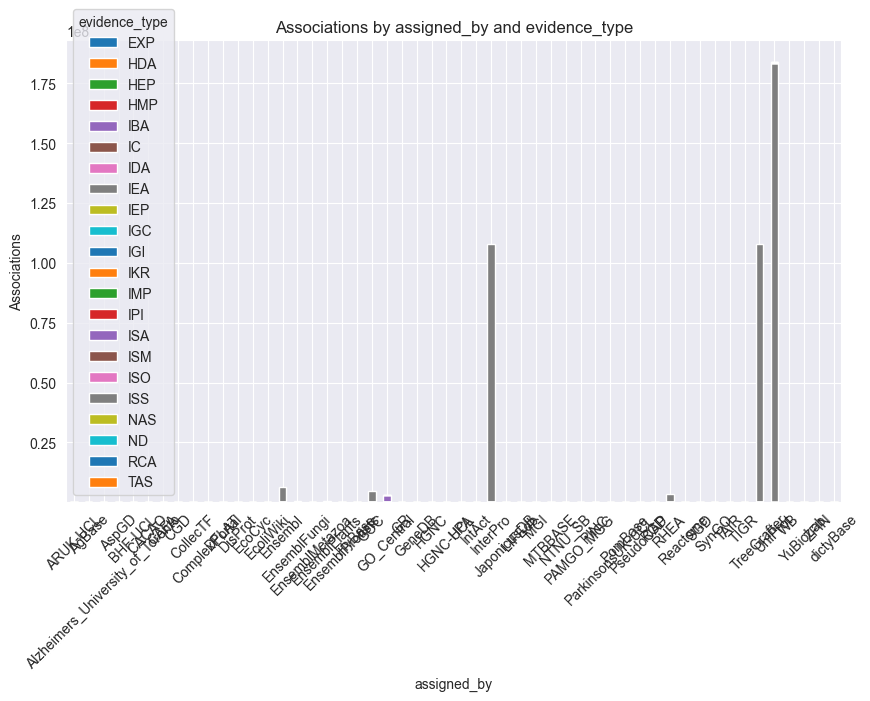

In [9]:
def plot_stacked_counts(df, col1="evidence_type", col2="aspect", **kwargs):
    count_df = get_stacked_counts(df, col1=col1, col2=col2, **kwargs)
    count_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Associations by {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel('Associations')
    plt.xticks(rotation=45)
    plt.legend(title=col2)
    plt.show()
    
plot_stacked_counts(df, col1="assigned_by", col2="evidence_type")

Running query in 'duckdb:///../../tmp/gcrp.db'

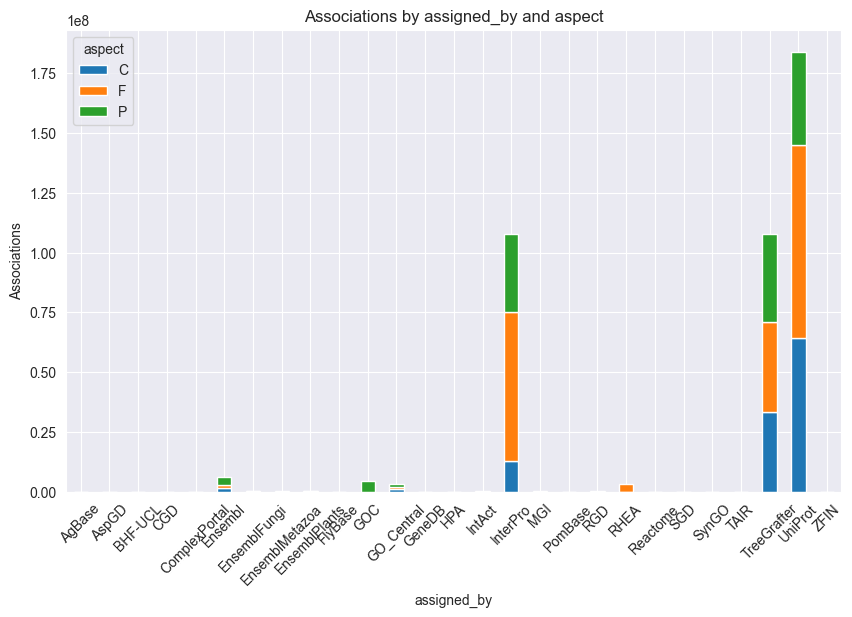

In [10]:
plot_stacked_counts(df, col1="assigned_by", col2="aspect", threshold=10000)

Running query in 'duckdb:///../../tmp/gcrp.db'

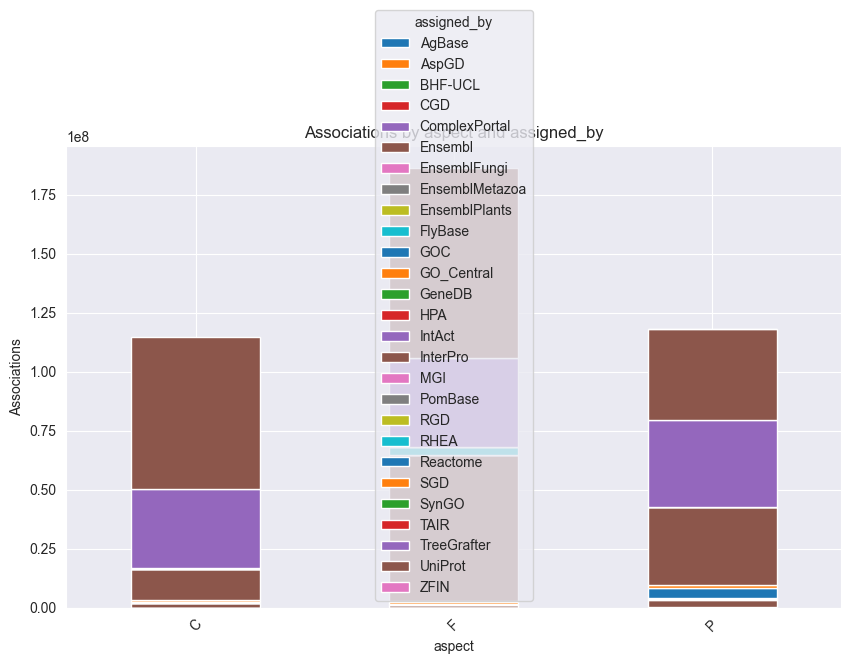

In [11]:
plot_stacked_counts(df, col1="aspect", col2="assigned_by", threshold=10000)

In [12]:
count_df = get_stacked_counts(df, col1="evidence_type", col2="assigned_by")

Running query in 'duckdb:///../../tmp/gcrp.db'

In [13]:
count_df

assigned_by,ARUK-UCL,AgBase,Alzheimers_University_of_Toronto,AspGD,BHF-UCL,CACAO,CAFA,CGD,CollecTF,ComplexPortal,...,SGD,SynGO,TAIR,TIGR,TreeGrafter,UniProt,WB,YuBioLab,ZFIN,dictyBase
evidence_type,,,,,,,,,,,,,,,,,,,,,
EXP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371.0,215.0,...,0.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HDA,0.0,0.0,0.0,0.0,1834.0,0.0,0.0,0.0,0.0,0.0,...,7067.0,0.0,16159.0,0.0,0.0,8663.0,378.0,0.0,0.0,629.0
HEP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,251.0,0.0,0.0,0.0,181.0,0.0,0.0,124.0
HMP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC,0.0,0.0,0.0,0.0,750.0,0.0,0.0,0.0,0.0,0.0,...,322.0,0.0,0.0,0.0,0.0,1170.0,0.0,0.0,0.0,140.0
IDA,3935.0,3220.0,0.0,1470.0,14184.0,1722.0,2656.0,3280.0,0.0,5103.0,...,16097.0,13298.0,14164.0,0.0,0.0,107228.0,6002.0,0.0,3741.0,3671.0
IEA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,107812398.0,183440803.0,0.0,0.0,0.0,0.0
IEP,0.0,373.0,0.0,173.0,255.0,0.0,0.0,0.0,169.0,0.0,...,0.0,1021.0,2526.0,0.0,0.0,3851.0,107.0,0.0,142.0,186.0


In [14]:
count_df.to_csv('/tmp/count_df.csv')

In [15]:
correlations = count_df.corr()

In [16]:
correlations

assigned_by,ARUK-UCL,AgBase,Alzheimers_University_of_Toronto,AspGD,BHF-UCL,CACAO,CAFA,CGD,CollecTF,ComplexPortal,...,SGD,SynGO,TAIR,TIGR,TreeGrafter,UniProt,WB,YuBioLab,ZFIN,dictyBase
assigned_by,,,,,,,,,,,,,,,,,,,,,
ARUK-UCL,1.000000,0.548012,0.428164,-0.082021,0.960995,0.788693,0.912308,0.129457,0.173443,0.241932,...,0.772942,0.776416,0.543962,-0.114208,-0.114258,-0.113307,0.872792,0.555993,0.526756,0.562074
AgBase,0.548012,1.000000,0.988678,-0.055499,0.453970,0.060691,0.321969,-0.037742,-0.047025,0.017207,...,0.058527,0.068570,0.105755,-0.057065,-0.063902,-0.062837,0.155451,0.913313,0.005685,0.315047
Alzheimers_University_of_Toronto,0.428164,0.988678,1.000000,-0.051509,0.321773,-0.068995,0.183080,-0.066180,-0.093493,-0.018282,...,-0.065039,-0.066967,0.016289,-0.047845,-0.047619,-0.046633,0.029278,0.901231,-0.064832,0.240772
AspGD,-0.082021,-0.055499,-0.051509,1.000000,-0.078895,-0.025560,-0.060604,0.871657,-0.079975,-0.078201,...,0.106940,-0.034049,0.357076,0.998982,-0.051509,-0.051572,-0.044867,-0.052835,0.181699,0.760146
BHF-UCL,0.960995,0.453970,0.321773,-0.078895,1.000000,0.847306,0.965242,0.154786,0.231237,0.227734,...,0.845375,0.850165,0.651971,-0.113030,-0.112924,-0.112026,0.876093,0.460768,0.494363,0.569804
CACAO,0.788693,0.060691,-0.068995,-0.025560,0.847306,1.000000,0.847218,0.267102,0.253989,0.152003,...,0.912659,0.849132,0.597060,-0.069323,-0.068995,-0.068524,0.945652,0.230077,0.756991,0.517920
CAFA,0.912308,0.321969,0.183080,-0.060604,0.965242,0.847218,1.000000,0.158717,0.378549,0.239683,...,0.824560,0.852561,0.613645,-0.095181,-0.094731,-0.093943,0.884558,0.331721,0.503773,0.551809
CGD,0.129457,-0.037742,-0.066180,0.871657,0.154786,0.267102,0.158717,1.000000,-0.001036,-0.066679,...,0.349212,0.166298,0.459112,0.857519,-0.091063,-0.091015,0.230911,0.047188,0.428764,0.805251
CollecTF,0.173443,-0.047025,-0.093493,-0.079975,0.231237,0.253989,0.378549,-0.001036,1.000000,0.054910,...,0.195713,0.052367,0.211708,-0.093937,-0.093493,-0.093396,0.313722,0.110533,0.396813,0.115210


In [17]:
count_df = get_pairwise_counts(df, col1="evidence_type", col2="aspect")
count_df

Running query in 'duckdb:///../../tmp/gcrp.db'

,evidence_type,aspect,count
0,IEA,P,116480205
1,IBA,C,1038047
2,ISO,C,63461
3,IDA,P,88030
4,ISS,F,58468
5,IEP,P,20443
6,IPI,P,1472
7,NAS,C,9244
8,EXP,F,2178
9,IGC,P,223


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def corr_heatmap(data: pd.DataFrame, col1="aspect", col2="evidence_type"):

    # Calculate total counts for each aspect across all evidence types
    total_counts_by_aspect = data.groupby(col1)['count'].sum()
    
    # Calculate total counts for each evidence type
    total_counts_by_ev = data.groupby(col2)['count'].sum()
    
    # Calculate the proportion of each aspect within each evidence type
    data['total_aspect_count'] = data[col1].map(total_counts_by_aspect)
    data['total_ev_count'] = data[col2].map(total_counts_by_ev)
    data['aspect_proportion_within_ev'] = data['count'] / data['total_ev_count']
    
    # Calculate the overall proportion of each aspect
    data['overall_aspect_proportion'] = data[col1].map(lambda x: total_counts_by_aspect[x] / total_counts_by_aspect.sum())
    
    # Correct approach to determine over- or under-representation
    data['representation_difference'] = data['aspect_proportion_within_ev'] - data['overall_aspect_proportion']
    
    # Preparing the final dataframe for visualization
    # Transform the representation difference into a format easier to visualize (over- or under-represented)
    final_df = data[[col2, col1, 'representation_difference']].pivot(index=col1, columns=col2, values='representation_difference')
    
    # Set up the matplotlib figure
    plt.figure(figsize=(14, 8))

    # Draw the heatmap
    sns.heatmap(final_df, annot=True, fmt=".2f", cmap='RdBu_r', center=0, linewidths=.5)
    
    # Enhance the visualization
    plt.title(f'Representation Difference of {col1} across {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    
    # Show the heatmap
    plt.show()


Running query in 'duckdb:///../../tmp/gcrp.db'

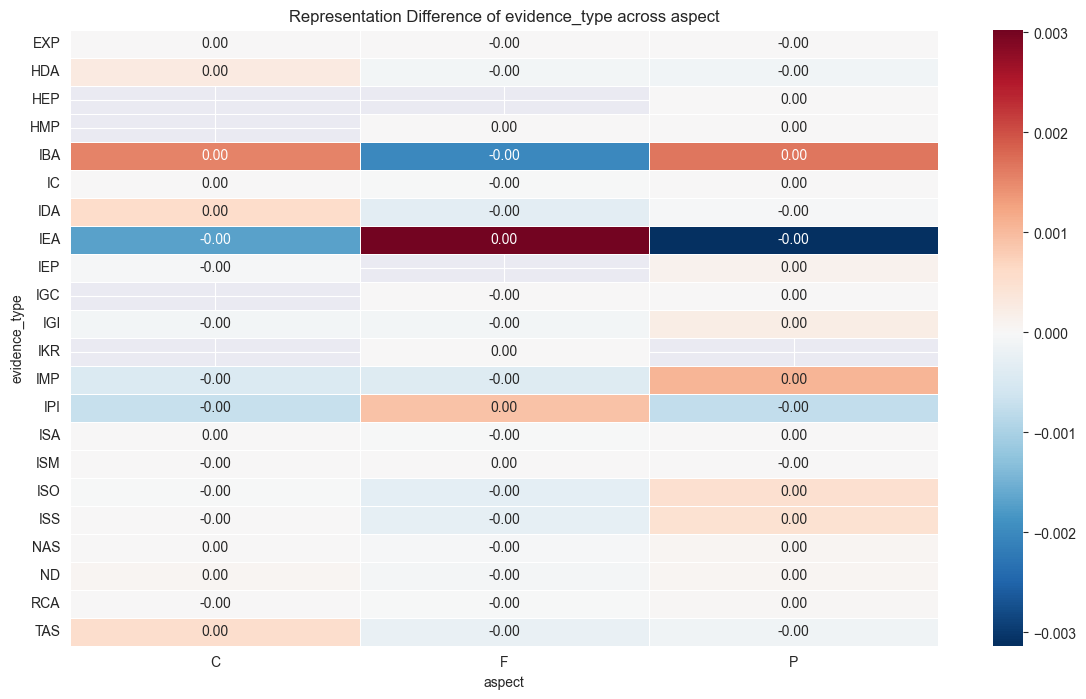

In [19]:
count_df = get_pairwise_counts(df, col1="evidence_type", col2="aspect")
corr_heatmap(count_df, col1="evidence_type", col2="aspect")

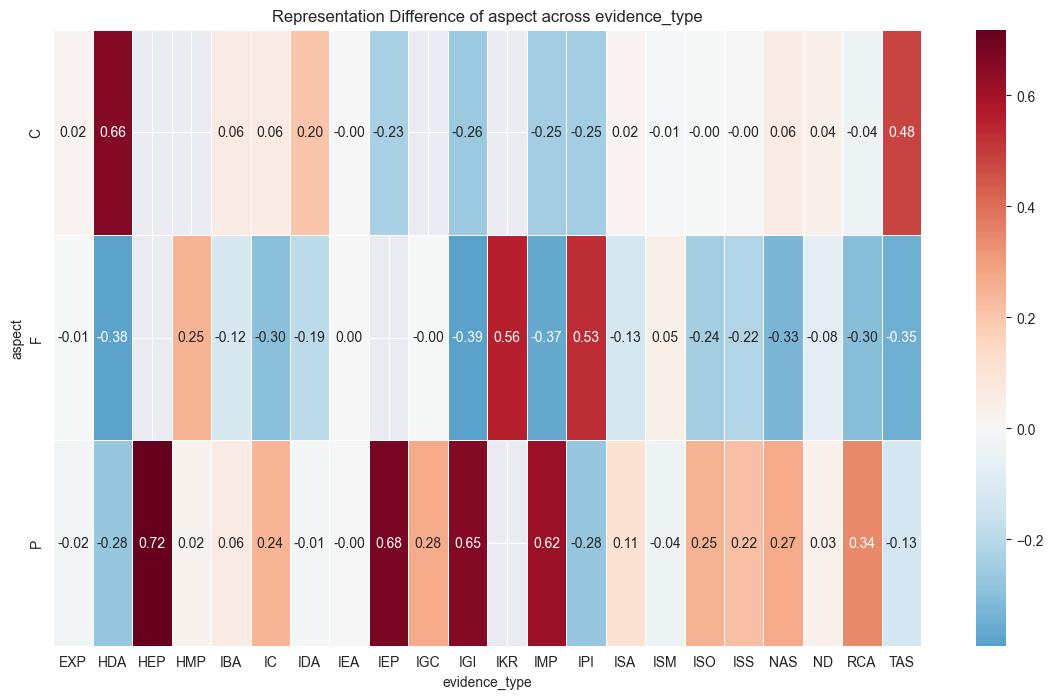

In [20]:
corr_heatmap(count_df, col2="evidence_type", col1="aspect")

Running query in 'duckdb:///../../tmp/gcrp.db'

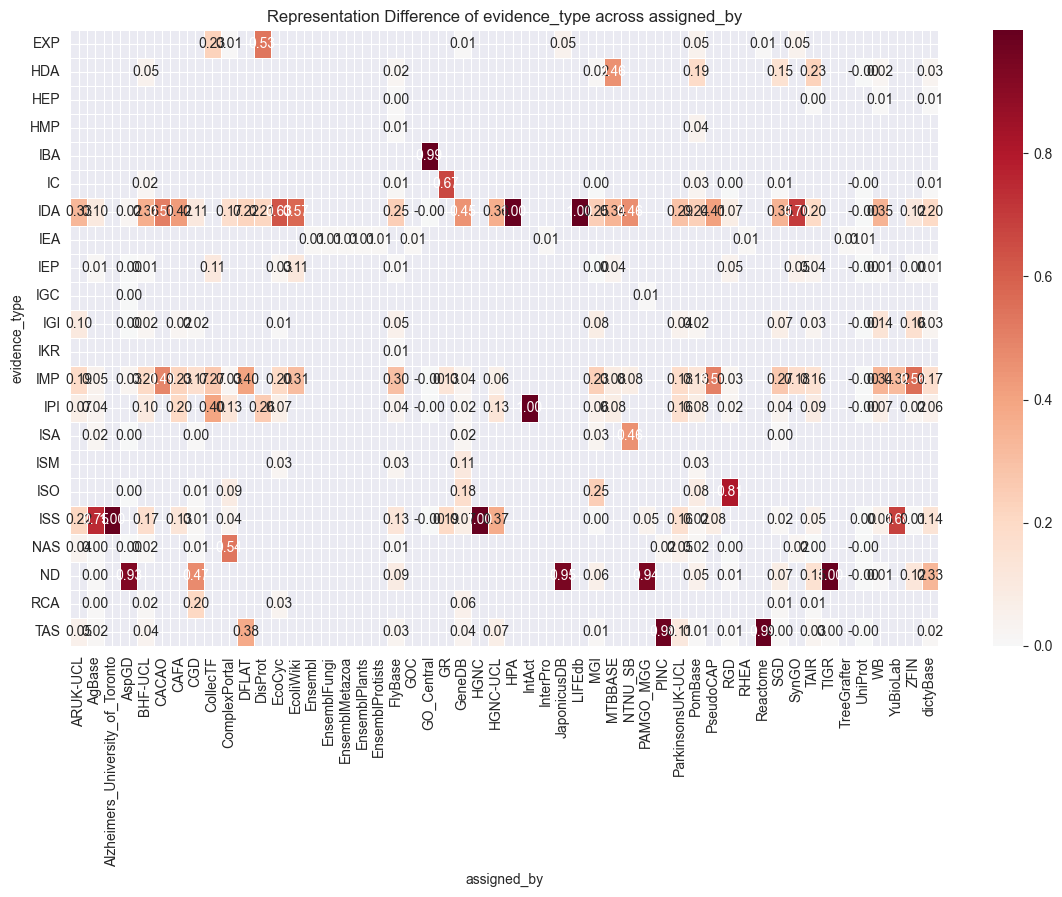

In [21]:
count_df = get_pairwise_counts(df, col1="evidence_type", col2="assigned_by")
corr_heatmap(count_df, col1="evidence_type", col2="assigned_by")

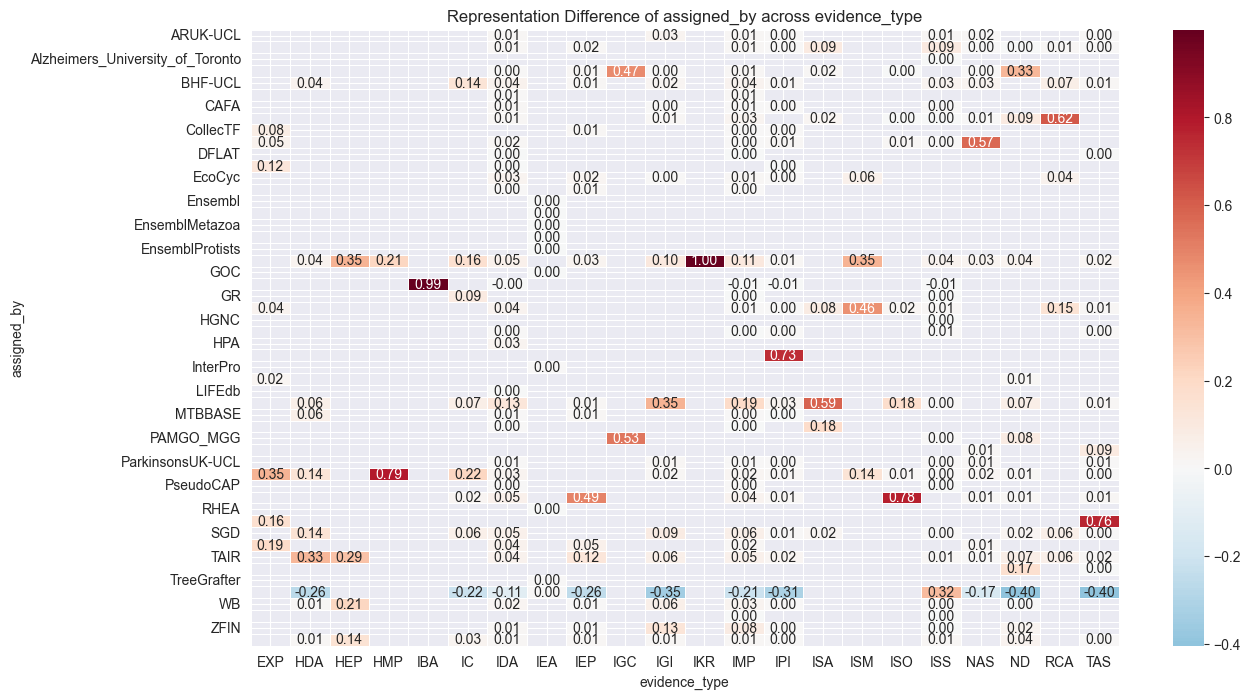

In [22]:
corr_heatmap(count_df, col2="evidence_type", col1="assigned_by")